# day 33

We don't care about time, we want to know where the projectile lands.

Modifications:
* Time is not an important factr
* secant method needed unpacked variables


In [2]:
g = 9.81 #m/s^2

def trajectory(r,x):
    y = r[0]
    v = r[1]
    th = r[2]
    
    fy = np.tan(th)           # dy/dx
    fv = (-g / v)*np.tan(th)  # dv/dx
    fth = (-g/v**2)              # d*theta/dx
    
    return np.array([fy, fv, fth], float)

In [27]:
# def crk4(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
#     r = np.array([x0,v0], float) #init conditions

#     tpoints = np.arange(t0,tf,dt)
#     xpoints = []
#     vpoints = []

#     for t in tpoints:
#         xpoints.append(r[0])
#         vpoints.append(r[1])
#         k1 = dt*f(r,t)
#         k2 = dt*f(r+0.5*k1, t+0.5*dt)
#         k3 = dt*f(r+0.5*k2, t+0.5*dt)
#         k4 = dt*f(r+0.5*k3, t+0.5*dt)
#         r = r + (k1+2*k2+2*k3+k4)/6
    
#     return tpoints, xpoints, vpoints

# def bisection(f, low, high, tolerance=2**-32):
#     mid = (low + high) / 2
#     while high-low > tolerance:
#         if f(low)*f(mid) < 0:
#             high = mid
#             mid = (low + high) / 2
#         elif f(high)*f(mid) < 0:
#             low = mid
#             mid = (low + high) / 2
#         elif f(low)*f(mid) > 0 and f(high)*f(mid) > 0:
#             print("No unique root in bracket")
#             break
#     return mid

# we only want initial velocity: cleanup crk4 function
def crk4end(f, x0, xf, y0, v0, th0, dx=2**-5):
    r = np.array([y0, v0, th0], float) #init conditions

    xpoints = np.arange(x0,xf,dx)
    ypoints = []
    vpoints = []
    thpoints = []

    for x in xpoints:
        ypoints.append(r[0])
        vpoints.append(r[1])
        thpoints.append(r[2])
        k1 = dx*f(r,x)
        k2 = dx*f(r+0.5*k1, x+0.5*dx)
        k3 = dx*f(r+0.5*k2, x+0.5*dx)
        k4 = dx*f(r+0.5*k3, x+0.5*dx)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return r[0] # last position

def helper(guess):
    answer = []
    for i in guess:
        answer.append(crk4end(trajectory, x0=0, xf=i, y0=0, v0=7, th0=(np.pi/4)))
    return answer

def shooting(guess):
    def shot(guess):
        y = crk4end(trajectory, x0=0, xf=5, y0=0, v0=7, th0=(guess))
        return y
    res = secant(shot, guess, 0.00000001)
    return res
    
def secant(f, guess, delta, tolerance=2**-16):
    x0 = guess
    x1 = x0+delta
    n = 0
    steps = 0
    while abs(f(x1)) > tolerance:
        x1 = x1 - (x1-x0)/(f(x1)-f(x0))*f(x1)
        n += 1
        steps += 1
        print(x1)
    return x1

def bisection(f, low, high, tolerance=2**-32):
    mid = (low + high) / 2
    while high-low > tolerance:
        if f(low)*f(mid) < 0:
            high = mid
            mid = (low + high) / 2
        elif f(high)*f(mid) < 0:
            low = mid
            mid = (low + high) / 2
        elif f(low)*f(mid) > 0 and f(high)*f(mid) > 0:
            print("No unique root in bracket")
            break
        print(mid)
    return mid

In [28]:
np.pi/4 #answer!

0.7853981633974483

In [29]:
shooting(0.7)

0.7483916146460332
0.7642044814058369
0.7729930937586658
0.779326114263129
0.7847894214882815
0.7902825338549836
0.796725176166437
0.8058000712872908
0.8225225995527335
0.876955458434859
0.44547064183581975
0.7265855746547976
0.7556118198187927
0.7678736226904009
0.7754834553071488
0.7813719970801356
0.7867523605847206
0.7924675866371276
0.7995971222341368
0.8105118548954696
0.8338270042450442
0.9598323110948734
0.6587955970092272
0.7410568333960305
0.7609496723710082
0.7709449265114995
0.7777332601149087
0.7833321409561401
0.7887366133917607
0.7948057936416034
0.8028970744261059
0.8165532898160517
0.8522542480751593
2.1069121788919345
0.6949330942987859
0.7472866551503728
0.763686016109902
0.772657162122111
0.7790594950995651
0.7845412937628358
0.7900148649850237
0.7963864170349871
0.8052741565163769
0.8213906730132876
0.8716206535584683
0.3529502350837963
0.724032584819003
0.7547918564741137
0.7674305578822096
0.7751717778351349
0.7811090488636144
0.786494071886391
0.7921730297943751

KeyboardInterrupt: 

In [6]:
def graph(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y)

In [7]:
x = np.linspace(0,5)

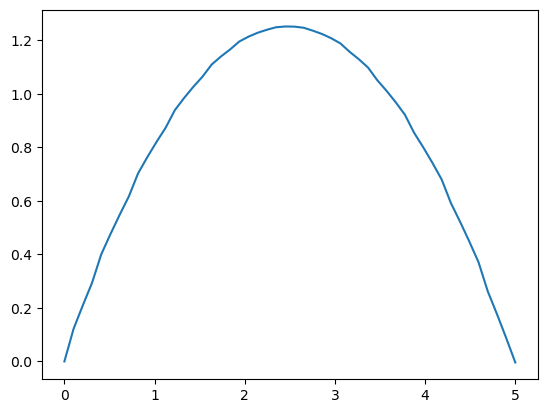

In [8]:
graph(x, helper(x))